<a href="https://colab.research.google.com/github/jobayed80/Machine_Learning_Learning_Course/blob/main/Lab_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **193-35-2948**
**Machine Learning Driven Data Analysis Lab (Fall-2023)**


---





# **1. Download the Iris Flower dataset from **
# https://www.kaggle.com/datasets/arshid/iris-flower-dataset.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# **II.	Load data into Pandas DataFrame.**

In [2]:
df = pd.DataFrame()
df

""


In [4]:
df= pd.read_csv("IRIS.csv")

In [5]:
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


# **III.	Explore the dataset, report the number of data and features.**

In [6]:
#the number of rows and columns (data and features)
num_rows, num_columns = df.shape
print(num_rows)
print(num_columns)

150
5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [10]:
print(df.columns)
print()
print(df.dtypes)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [11]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **V.	Preprocess the dataset as necessary, for example, splitting, scaling, normalizing, etc.**

In [12]:
# Separate features (X) and target variable (y)
# select sepal_length feature
x = df.iloc[:, 0:1].values
print(x)
print(x.shape)

print("\n")

# select species feature
y = df.iloc[:, -1]
print(y)
print(y.shape)

[[5.1]
 [4.9]
 [4.7]
 [4.6]
 [5. ]
 [5.4]
 [4.6]
 [5. ]
 [4.4]
 [4.9]
 [5.4]
 [4.8]
 [4.8]
 [4.3]
 [5.8]
 [5.7]
 [5.4]
 [5.1]
 [5.7]
 [5.1]
 [5.4]
 [5.1]
 [4.6]
 [5.1]
 [4.8]
 [5. ]
 [5. ]
 [5.2]
 [5.2]
 [4.7]
 [4.8]
 [5.4]
 [5.2]
 [5.5]
 [4.9]
 [5. ]
 [5.5]
 [4.9]
 [4.4]
 [5.1]
 [5. ]
 [4.5]
 [4.4]
 [5. ]
 [5.1]
 [4.8]
 [5.1]
 [4.6]
 [5.3]
 [5. ]
 [7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]
 [5.7]
 [6.3]
 [4.9]
 [6.6]
 [5.2]
 [5. ]
 [5.9]
 [6. ]
 [6.1]
 [5.6]
 [6.7]
 [5.6]
 [5.8]
 [6.2]
 [5.6]
 [5.9]
 [6.1]
 [6.3]
 [6.1]
 [6.4]
 [6.6]
 [6.8]
 [6.7]
 [6. ]
 [5.7]
 [5.5]
 [5.5]
 [5.8]
 [6. ]
 [5.4]
 [6. ]
 [6.7]
 [6.3]
 [5.6]
 [5.5]
 [5.5]
 [6.1]
 [5.8]
 [5. ]
 [5.6]
 [5.7]
 [5.7]
 [6.2]
 [5.1]
 [5.7]
 [6.3]
 [5.8]
 [7.1]
 [6.3]
 [6.5]
 [7.6]
 [4.9]
 [7.3]
 [6.7]
 [7.2]
 [6.5]
 [6.4]
 [6.8]
 [5.7]
 [5.8]
 [6.4]
 [6.5]
 [7.7]
 [7.7]
 [6. ]
 [6.9]
 [5.6]
 [7.7]
 [6.3]
 [6.7]
 [7.2]
 [6.2]
 [6.1]
 [6.4]
 [7.2]
 [7.4]
 [7.9]
 [6.4]
 [6.3]
 [6.1]
 [7.7]
 [6.3]
 [6.4]
 [6. ]
 [6.9]
 [6.7]
 [6.9]
 [5.8]

In [13]:
# LabelEncoder from scikit to encode target variable y
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)

In [14]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [15]:
# Split the data into training and testing sets
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [16]:
# Perform scaling or normalization if needed
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#This means it calculates the mean and standard deviation from the training set
x_train_scaled = scaler.fit_transform(x_train)

#use the mean and stanadard deviation from the training set (x_train) tp transform the testing set
x_test_scaled = scaler.transform(x_test)

print(x_train_scaled)
print()
print(x_test_scaled)

[[ 0.61303014]
 [-0.56776627]
 [-0.80392556]
 [ 0.25879121]
 [ 0.61303014]
 [-0.80392556]
 [-0.21352735]
 [ 0.14071157]
 [ 0.02263193]
 [-0.09544771]
 [ 1.0853487 ]
 [-1.39432376]
 [ 1.20342834]
 [-1.04008484]
 [-0.56776627]
 [-1.04008484]
 [ 0.73110978]
 [ 0.96726906]
 [ 0.14071157]
 [ 0.96726906]
 [-0.33160699]
 [ 2.14806547]
 [ 0.49495049]
 [-0.44968663]
 [ 0.49495049]
 [ 0.49495049]
 [-1.15816448]
 [ 0.49495049]
 [ 1.32150798]
 [ 0.73110978]
 [ 0.14071157]
 [-1.27624412]
 [-0.09544771]
 [-0.33160699]
 [-0.33160699]
 [-0.44968663]
 [ 0.25879121]
 [ 1.55766726]
 [-0.68584591]
 [-1.86664232]
 [ 0.61303014]
 [-0.21352735]
 [-0.56776627]
 [-0.21352735]
 [ 1.20342834]
 [-1.5124034 ]
 [ 0.02263193]
 [-0.9220052 ]
 [-1.5124034 ]
 [ 0.37687085]
 [ 1.55766726]
 [-0.21352735]
 [-1.27624412]
 [ 1.43958762]
 [ 1.20342834]
 [ 0.73110978]
 [ 0.61303014]
 [-0.9220052 ]
 [-1.27624412]
 [ 0.73110978]
 [ 0.96726906]
 [-1.63048304]
 [ 0.37687085]
 [-1.15816448]
 [-0.21352735]
 [ 1.20342834]
 [-1.74856

# **VI.	Train Logistic Regression, Support Vector Machine, and Decision Tree algorithm on the dataset.**

In [17]:
# Train Logistic Regression
# from sklearn.linear_model import LogisticRegression
logistic_reg_model = LogisticRegression(max_iter=1000)
logistic_reg_model.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [18]:
# Train Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(x_train, y_train)


SVC()

In [19]:
# Train Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [20]:

# Make predictions on the test set
y_pred_logistic_regression = logistic_reg_model.predict(x_test)
y_pred_svm = svm_model.predict(x_test)
y_pred_decision_tree = decision_tree_model.predict(x_test)
print(y_pred_logistic_regression)
print(y_pred_svm)
print(y_pred_decision_tree)

[1 1 1 2 0 2 0 2 2 1 1 2 1 2 1 0 1 1 0 0 1 1 0 0 2 0 0 2 0 0]
[1 1 1 2 0 2 0 2 2 2 2 2 2 2 2 0 1 1 0 0 1 1 0 0 2 0 0 2 0 0]
[1 1 1 2 0 2 0 2 2 1 1 2 1 2 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 0]


In [21]:
# Evaluate the models
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)

In [22]:
print("Logistic Regression Accuracy:", accuracy_logistic_regression)
print("SVM Accuracy:", accuracy_svm)
print("Decision Tree Accuracy:", accuracy_decision_tree)

Logistic Regression Accuracy: 0.6666666666666666
SVM Accuracy: 0.6
Decision Tree Accuracy: 0.6666666666666666


In [23]:
# Additional: Print classification reports for detailed evaluation
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test, y_pred_logistic_regression))
print("\n")
print("\nClassification Report for SVM:\n", classification_report(y_test, y_pred_svm))
print("\n")
print("\nClassification Report for Decision Tree:\n", classification_report(y_test, y_pred_decision_tree))


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.64      0.54      0.58        13
           2       0.38      0.50      0.43         6

    accuracy                           0.67        30
   macro avg       0.64      0.65      0.64        30
weighted avg       0.68      0.67      0.67        30




Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        11
           1       0.57      0.31      0.40        13
           2       0.33      0.67      0.44         6

    accuracy                           0.60        30
   macro avg       0.60      0.63      0.58        30
weighted avg       0.65      0.60      0.60        30




Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.91      0.91      0.91        11


# **VII.	Use hyperparameter tuning techniques to select the best hyperparameters of the respective models, and finally select the best model of each kind.**

Data Visualization

In [24]:
# Finding out the correlation between the features
corr = df.corr()
corr.shape

<ipython-input-24-a38674e7a81e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


(4, 4)

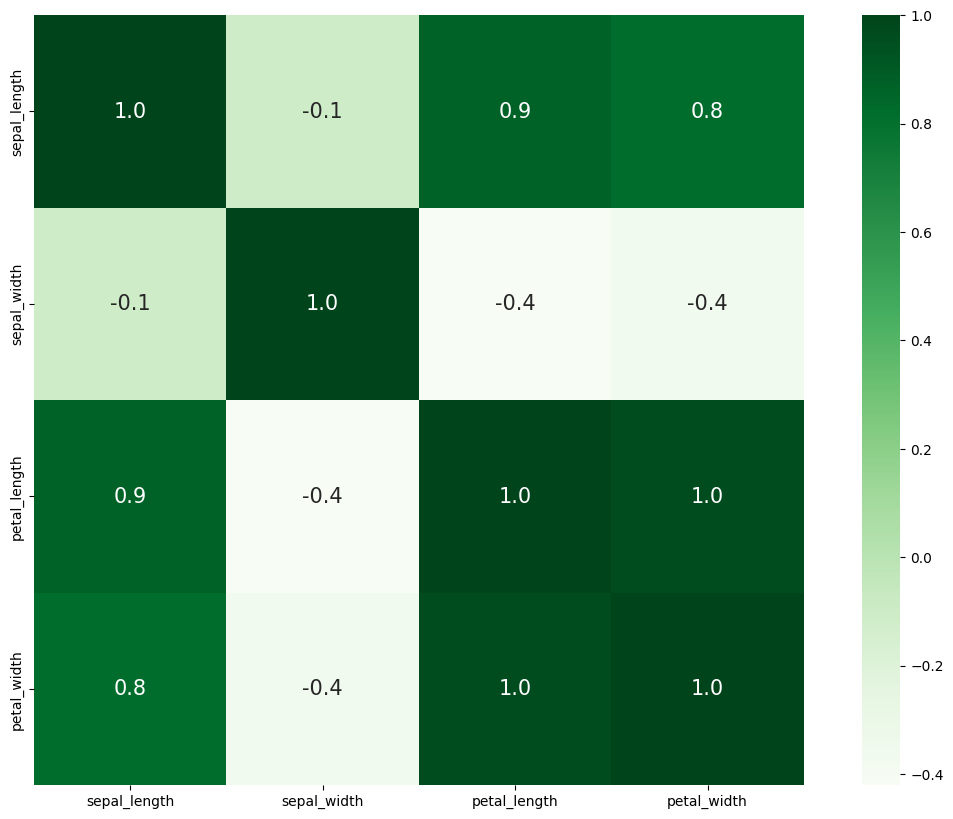

In [25]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(15,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')
plt.show()

**Scatter Plot Visualization**

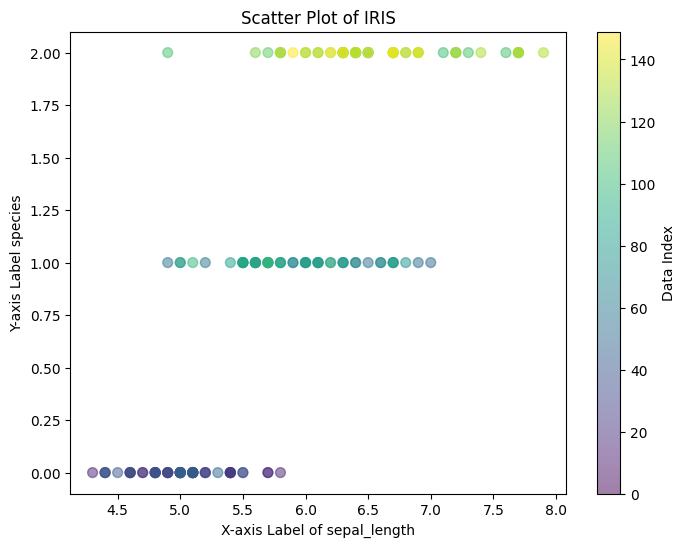

In [26]:

plt.figure(figsize=(8, 6))

# can choose different colors and markers for scatter plot
plt.scatter(x, y, c=np.arange(len(x)), cmap='viridis', s=50, alpha=0.5)

# Add labels and title
plt.xlabel('X-axis Label of sepal_length')
plt.ylabel('Y-axis Label species')
plt.title('Scatter Plot of IRIS')

# Add colorbar
cbar = plt.colorbar()
cbar.set_label('Data Index')

# Show the plot
plt.show()

**Scatter Plot Visualization**

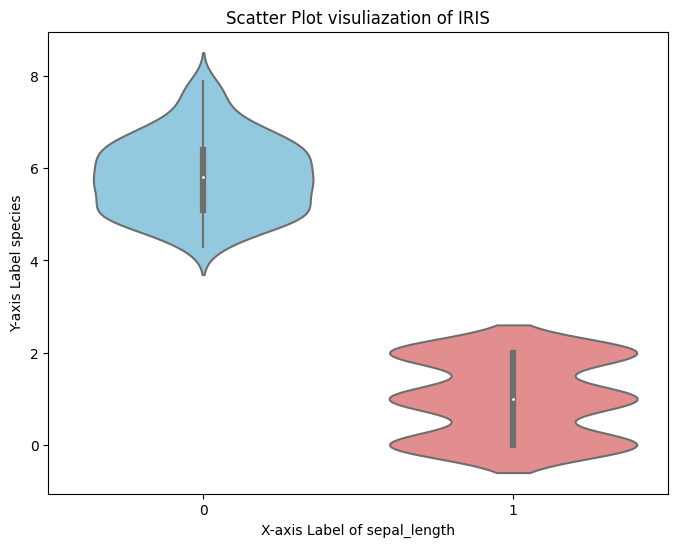

In [27]:

# Resize the figure
plt.figure(figsize=(8, 6))


# Create a violin plot
sns.violinplot(data=[x,y],palette=['skyblue', 'lightcoral'], names=['X', 'Y'])

# Add labels and title
plt.xlabel('X-axis Label of sepal_length')
plt.ylabel('Y-axis Label species')
plt.title('Scatter Plot visuliazation of IRIS')
# Show the plot
plt.show()

➿**Support Vector Machine (SVM):**

In [28]:

svm_classifier = SVC()
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(svm_classifier, param_grid_svm, cv=5, scoring='accuracy')
grid_search_svm.fit(x_train, y_train)
best_svm_model = grid_search_svm.best_estimator_
print(best_svm_model)

SVC(C=0.1)


**K-Nearest Neighbors (KNN):**

In [29]:
knn_classifier = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

grid_search_knn = GridSearchCV(knn_classifier, param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(x_train, y_train)

best_knn_model = grid_search_knn.best_estimator_
best_knn_model

KNeighborsClassifier(n_neighbors=9)

In [30]:
# Evaluate the models on the test set
y_pred_svm = best_svm_model.predict(x_test)
y_pred_knn = best_knn_model.predict(x_test)


accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("SVM Accuracy:", accuracy_svm)
print("KNN Accuracy:", accuracy_knn)

SVM Accuracy: 0.6
KNN Accuracy: 0.6333333333333333


# **VIII.	Evaluate training performance on the train data by generating confusion matrices and computing accuracy, precision, recall, f1 score, and so on**

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predictions on the training set
y_train_pred_logistic_regression = logistic_reg_model.predict(x_train)
y_train_pred_svm = svm_model.predict(x_train)
y_train_pred_decision_tree = decision_tree_model.predict(x_train)

# Confusion matrix and evaluation metrics for Logistic Regression
conf_matrix_logistic_regression = confusion_matrix(y_train, y_train_pred_logistic_regression)
accuracy_train_logistic_regression = accuracy_score(y_train, y_train_pred_logistic_regression)
precision_train_logistic_regression = precision_score(y_train, y_train_pred_logistic_regression, average='weighted')
recall_train_logistic_regression = recall_score(y_train, y_train_pred_logistic_regression, average='weighted')
f1_train_logistic_regression = f1_score(y_train, y_train_pred_logistic_regression, average='weighted')

print("Confusion Matrix (Logistic Regression):\n", conf_matrix_logistic_regression)
print("\nAccuracy (Logistic Regression):", accuracy_train_logistic_regression)
print("Precision (Logistic Regression):", precision_train_logistic_regression)
print("Recall (Logistic Regression):", recall_train_logistic_regression)
print("F1 Score (Logistic Regression):", f1_train_logistic_regression)

Confusion Matrix (Logistic Regression):
 [[35  4  0]
 [ 5 21 11]
 [ 1  7 36]]

Accuracy (Logistic Regression): 0.7666666666666667
Precision (Logistic Regression): 0.760633838220031
Recall (Logistic Regression): 0.7666666666666667
F1 Score (Logistic Regression): 0.76216604953018


In [32]:
# Confusion matrix and evaluation metrics for SVM
conf_matrix_svm = confusion_matrix(y_train, y_train_pred_svm)
accuracy_train_svm = accuracy_score(y_train, y_train_pred_svm)
precision_train_svm = precision_score(y_train, y_train_pred_svm, average='weighted')
recall_train_svm = recall_score(y_train, y_train_pred_svm, average='weighted')
f1_train_svm = f1_score(y_train, y_train_pred_svm, average='weighted')

print("\nConfusion Matrix (SVM):\n", conf_matrix_svm)
print("\nAccuracy (SVM):", accuracy_train_svm)
print("Precision (SVM):", precision_train_svm)
print("Recall (SVM):", recall_train_svm)
print("F1 Score (SVM):", f1_train_svm)



Confusion Matrix (SVM):
 [[35  4  0]
 [ 5 20 12]
 [ 1  6 37]]

Accuracy (SVM): 0.7666666666666667
Precision (SVM): 0.7598653282451191
Recall (SVM): 0.7666666666666667
F1 Score (SVM): 0.7602108743914833


In [33]:

# Confusion matrix and evaluation metrics for Decision Tree
conf_matrix_decision_tree = confusion_matrix(y_train, y_train_pred_decision_tree)
accuracy_train_decision_tree = accuracy_score(y_train, y_train_pred_decision_tree)
precision_train_decision_tree = precision_score(y_train, y_train_pred_decision_tree, average='weighted')
recall_train_decision_tree = recall_score(y_train, y_train_pred_decision_tree, average='weighted')
f1_train_decision_tree = f1_score(y_train, y_train_pred_decision_tree, average='weighted')

print("\nConfusion Matrix (Decision Tree):\n", conf_matrix_decision_tree)
print("\nAccuracy (Decision Tree):", accuracy_train_decision_tree)
print("Precision (Decision Tree):", precision_train_decision_tree)
print("Recall (Decision Tree):", recall_train_decision_tree)
print("F1 Score (Decision Tree):", f1_train_decision_tree)



Confusion Matrix (Decision Tree):
 [[35  4  0]
 [ 5 25  7]
 [ 1  8 35]]

Accuracy (Decision Tree): 0.7916666666666666
Precision (Decision Tree): 0.7913279132791329
Recall (Decision Tree): 0.7916666666666666
F1 Score (Decision Tree): 0.7911579457364339


# **I.	Download the New York City Airbnb dataset from https://www.kaggle.com/

---

datasets/dgomonov/new-york-city-airbnb-open-data.**

# **II.	Load data into Pandas DataFrame.**

In [44]:
df = pd.read_csv("AB_NYC_2019.csv")

In [45]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


# **III.	Explore the dataset, report the number of data and features. Report a summary of each feature.**

---



In [47]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [48]:
rows_df , columns_df = df.shape

In [49]:
print(rows_df)
print(columns_df)

48895
16


In [50]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [53]:
# Fill missing values with median
df.fillna(df.median(), inplace=True)

<ipython-input-53-3fa23bbf0e59>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.median(), inplace=True)


In [54]:
# Assuming 'dataset' is your DataFrame with categorical columns
le = LabelEncoder()

# Apply label encoding to each categorical column
for column in df.columns:
    if df[column].dtype == 'object':  # Check if the column contains categorical data
        df[column] = le.fit_transform(df[column])

In [55]:
df.isna().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [56]:
# Display a summary of each feature
summary = df.describe(include='all')
print(summary)

                 id          name       host_id     host_name  \
count  4.889500e+04  48895.000000  4.889500e+04  48895.000000   
mean   1.901714e+07  23968.393987  6.762001e+07   5426.211658   
std    1.098311e+07  13815.638205  7.861097e+07   3230.083068   
min    2.539000e+03      0.000000  2.438000e+03      0.000000   
25%    9.471945e+06  12010.500000  7.822033e+06   2512.500000   
50%    1.967728e+07  23937.000000  3.079382e+07   5321.000000   
75%    2.915218e+07  35915.500000  1.074344e+08   8195.000000   
max    3.648724e+07  47905.000000  2.743213e+08  11452.000000   

       neighbourhood_group  neighbourhood      latitude     longitude  \
count         48895.000000   48895.000000  48895.000000  48895.000000   
mean              1.675345     107.122732     40.728949    -73.952170   
std               0.735816      68.743096      0.054530      0.046157   
min               0.000000       0.000000     40.499790    -74.244420   
25%               1.000000      51.000000     40.

# **IV.	Visualize the features using appropriate charts like bar chart, grouped

---

bar chart, stacked bar chart, histogram, etc. to summarize each feature and their interactions.**

<ipython-input-57-4ce92117f214>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['neighbourhood_group'], y=df['availability_365'], ci=None)


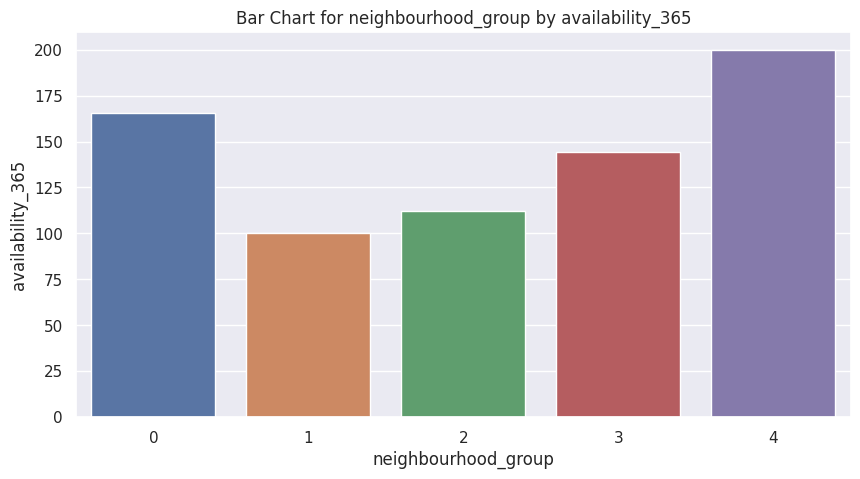

In [57]:
# Set the style for Seaborn
sns.set(style="darkgrid")

# Bar chart for a single feature
plt.figure(figsize=(10, 5))
sns.barplot(x=df['neighbourhood_group'], y=df['availability_365'], ci=None)
plt.title('Bar Chart for neighbourhood_group by availability_365')
plt.show()

<ipython-input-58-e7f914b59e33>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['neighbourhood_group'], y=df['availability_365'], ci=None, label='neighbourhood_group')
<ipython-input-58-e7f914b59e33>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['neighbourhood_group'], y=df['availability_365'], ci=None, label='availability_365')


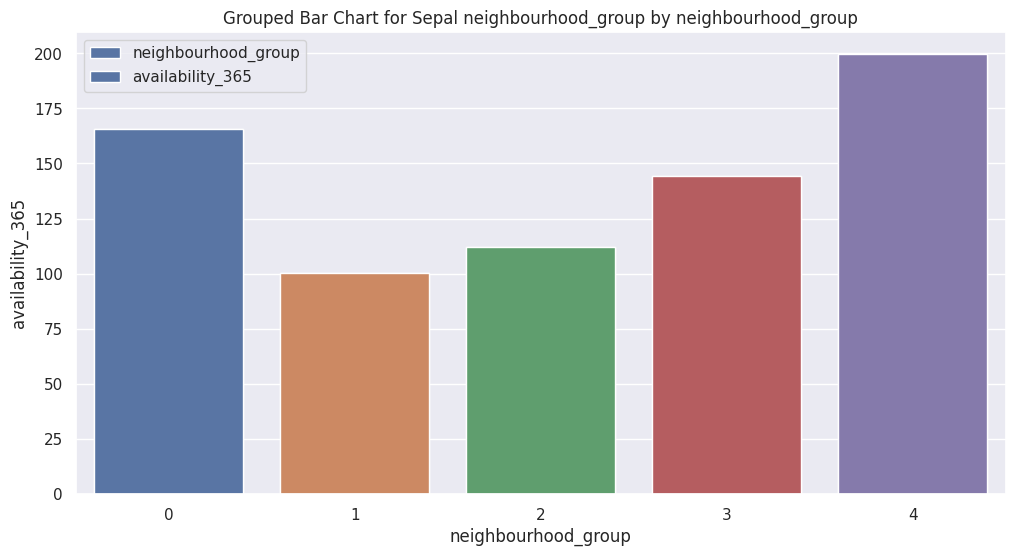

In [58]:
# Grouped bar chart for multiple features
plt.figure(figsize=(12, 6))
sns.barplot(x=df['neighbourhood_group'], y=df['availability_365'], ci=None, label='neighbourhood_group')
sns.barplot(x=df['neighbourhood_group'], y=df['availability_365'], ci=None, label='availability_365')
plt.title('Grouped Bar Chart for Sepal neighbourhood_group by neighbourhood_group')
plt.legend()
plt.show()

In [60]:
# # Stacked bar chart for categorical data
# species_counts = df['host_id'].value_counts()
# plt.figure(figsize=(10, 5))
# sns.barplot(x=species_counts.index, y=species_counts.values)
# plt.title('Stacked Bar Chart for Species Counts')
# plt.show()

0            2787
1            2845
2            4632
3            4869
4            7192
           ...   
48890     8232441
48891     6570630
48892    23492952
48893    30985759
48894    68119814
Name: host_id, Length: 48895, dtype: int64

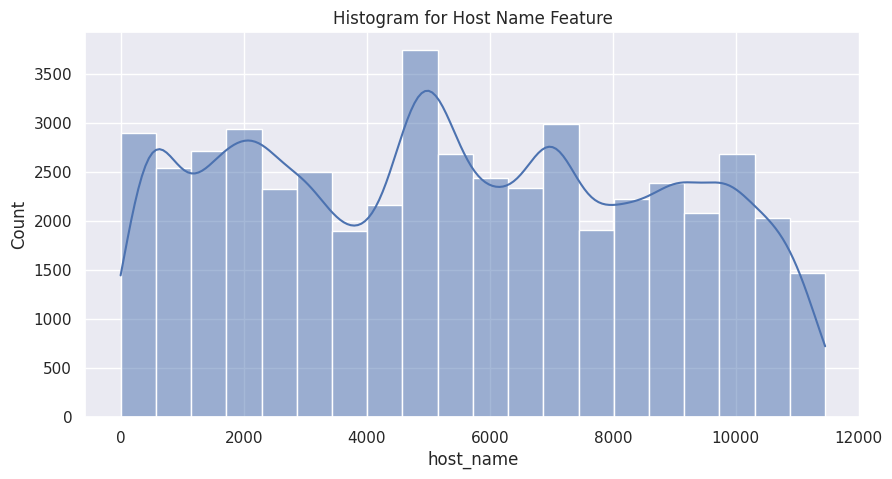

In [59]:
# Histogram for numerical data
plt.figure(figsize=(10, 5))
sns.histplot(df['host_name'], bins=20, kde=True)
plt.title('Histogram for Host Name Feature')
plt.show()

# **V.	Preprocess the dataset as necessary, for example, splitting, scaling,

---

normalizing, one-hot encoding, binning, etc.**

In [ ]:
df.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,12328,2787,4989,1,108,40.64749,-73.97237,1,149,1,9,1501,0.21,6,365
1,2595,37455,2845,4785,2,127,40.75362,-73.98377,0,225,1,45,1715,0.38,2,355


In [63]:
# Separate features (X) and target variable (y)
# select sepal_length feature
x1 = df.iloc[:, 2:3].values
print(x1)
print(x1.shape)

print("\n")

# select species feature
y1 = df.iloc[:, -1]
print(y1)
print(y1.shape)

[[    2787]
 [    2845]
 [    4632]
 ...
 [23492952]
 [30985759]
 [68119814]]
(48895, 1)


0        365
1        355
2        365
3        194
4          0
        ... 
48890      9
48891     36
48892     27
48893      2
48894     23
Name: availability_365, Length: 48895, dtype: int64
(48895,)


Splitting the Dataset:

In [64]:
# from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=42)

Scaling/Normalization:

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

One-Hot Encoding:

In [66]:
# Assuming 'species' is a categorical variable
data_encoded = pd.get_dummies(df, columns=['availability_365'], drop_first=True)

Binning/Discretization:

In [67]:
from sklearn.preprocessing import KBinsDiscretizer

# Example: Binning 'sepal_length' into 3 bins
bin_discretizer = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')
binded = bin_discretizer.fit_transform(df[['availability_365']])
print(binded)

[[2.]
 [2.]
 [2.]
 ...
 [0.]
 [0.]
 [0.]]


# **VI.	Train Linear Regression, Support Vector Machine, and Decision Tree

---

algorithm on the dataset.**

In [68]:
# Train Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(x1_train, y1_train)

LinearRegression()

Train Support Vector Machine (SVM)

In [75]:
# Train Support Vector Machine (SVM)
svm_model = SVR()
svm_model.fit(x1_train, y1_train)

SVR()

In [83]:

# Train Decision Tree
decision_tree_model = DecisionTreeRegressor()


# **VII.	Use hyperparameter tuning techniques to select the best hyperparameters of the respective models, and finally select the best model of each kind.**

In [76]:
# Hyperparameter tuning for Linear Regression (no hyperparameters to tune)
linear_reg_model = LinearRegression()
# Fit the Linear Regression model
linear_reg_model.fit(x1_train, y1_train)

LinearRegression()

In [82]:
# Hyperparameter tuning for Decision Tree
decision_tree_model = DecisionTreeRegressor()
tree_param_grid = {'max_depth': [None, 5, 10, 15], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
tree_grid_search = GridSearchCV(decision_tree_model, tree_param_grid, scoring='neg_mean_squared_error', cv=3)
tree_grid_search.fit(x1_train, y1_train)

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error')

# **VIII.	Evaluate training performance on the train data by computing errors

---

like Mean Absolute Error, Mean Square Error, Root Mean Square Error, etc.**

In [91]:
# # Fit the Linear Regression model
decision_tree_model.fit(x1_train, y1_train)

# Make predictions on the test set
y_pred_linear_reg_test = linear_reg_model.predict(x1_train)
y_pred_decision_tree_test = decision_tree_model.predict(x1_train)

# Evaluate the models on the test set
mae_linear_reg_test = mean_absolute_error(y1_train, y_pred_linear_reg_test)
mse_linear_reg_test = mean_squared_error(y1_train, y_pred_linear_reg_test)
rmse_linear_reg_test = mean_squared_error(y1_train, y_pred_linear_reg_test, squared=False)

mae_decision_tree_test = mean_absolute_error(y1_train, y_pred_decision_tree_test)
mse_decision_tree_test = mean_squared_error(y1_train, y_pred_decision_tree_test)
rmse_decision_tree_test = mean_squared_error(y1_train, y_pred_decision_tree_test, squared=False)

# Print evaluation metrics for test set
print("Linear Regression Test Metrics:")
print("Mean Absolute Error:", mae_linear_reg_test)
print("Mean Squared Error:", mse_linear_reg_test)
print("Root Mean Squared Error:", rmse_linear_reg_test)

print("\nDecision Tree Test Metrics:")
print("Mean Absolute Error:", mae_decision_tree_test)
print("Mean Squared Error:", mse_decision_tree_test)
print("Root Mean Squared Error:", rmse_decision_tree_test)


Linear Regression Test Metrics:
Mean Absolute Error: 112.76667639318498
Mean Squared Error: 16659.404799297565
Root Mean Squared Error: 129.0713167179198

Decision Tree Test Metrics:
Mean Absolute Error: 11.731259833787018
Mean Squared Error: 1144.106371294345
Root Mean Squared Error: 33.824641480647585


# **IX.	Evaluate their results on the test data by computing errors like Mean

---

Absolute Error, Mean Square Error, Root Mean Square Error, etc.**

In [92]:
# # Fit the Linear Regression model
decision_tree_model.fit(x1_train, y1_train)

# Make predictions on the test set
y_pred_linear_reg_test = linear_reg_model.predict(x1_test)
y_pred_decision_tree_test = decision_tree_model.predict(x1_test)

# Evaluate the models on the test set
mae_linear_reg_test = mean_absolute_error(y1_test, y_pred_linear_reg_test)
mse_linear_reg_test = mean_squared_error(y1_test, y_pred_linear_reg_test)
rmse_linear_reg_test = mean_squared_error(y1_test, y_pred_linear_reg_test, squared=False)

mae_decision_tree_test = mean_absolute_error(y1_test, y_pred_decision_tree_test)
mse_decision_tree_test = mean_squared_error(y1_test, y_pred_decision_tree_test)
rmse_decision_tree_test = mean_squared_error(y1_test, y_pred_decision_tree_test, squared=False)


In [93]:
# Print evaluation metrics for test set
print("Linear Regression Test Metrics:")
print("Mean Absolute Error:", mae_linear_reg_test)
print("Mean Squared Error:", mse_linear_reg_test)
print("Root Mean Squared Error:", rmse_linear_reg_test)

print("\nDecision Tree Test Metrics:")
print("Mean Absolute Error:", mae_decision_tree_test)
print("Mean Squared Error:", mse_decision_tree_test)
print("Root Mean Squared Error:", rmse_decision_tree_test)

Linear Regression Test Metrics:
Mean Absolute Error: 111.90369753968693
Mean Squared Error: 16398.177696019146
Root Mean Squared Error: 128.0553696493011

Decision Tree Test Metrics:
Mean Absolute Error: 94.43241141789714
Mean Squared Error: 20393.867032904873
Root Mean Squared Error: 142.80709727777844
